# GRIP: The Spark Foundation.

## Data Science and Buisness Analytics Intern.

### Task 2: Prediction using unsupervised ML Problem.

### Author: Abhishek Barandooru Janavejirao.

### Objective

##### From the given iris dataset predict the optimum number of clusters and represent it visually

# step 1. Import The Required Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### load the data

In [30]:
data = pd.read_csv('https://github.com/abhishekbj97/The_Spark_Data_science_Internship2-/raw/386d68dd1c27ad06cace0f7f35c79f4d2302dd62/Iris.csv')

In [31]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## step 2. Exploring the data

In [33]:
data.shape

(150, 6)

In [34]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [36]:
# Removing the 'Id' column
data.drop('Id' , axis=1, inplace=True) 
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## step 3. Using the Elow Method to find the Optimal numbers of clusters

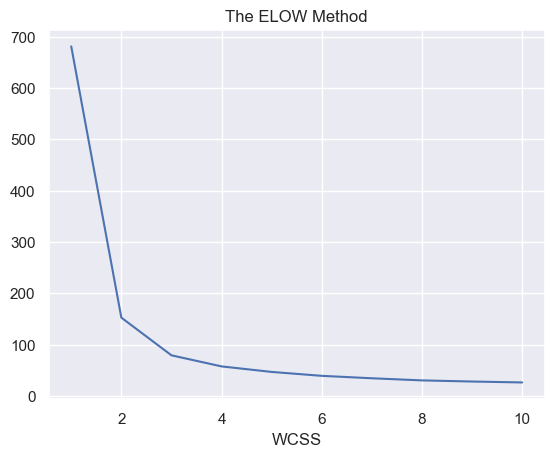

In [38]:
# Find the optimal number of clusters for k means clustering
x=data.iloc[:,:-1].values
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The ELOW Method')
plt.xlabel('WCSS')
plt.show()

In [39]:
# Apply means to the dataset
kmeans=KMeans(n_clusters=3,
             max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Step 4 : Visualize the test set result

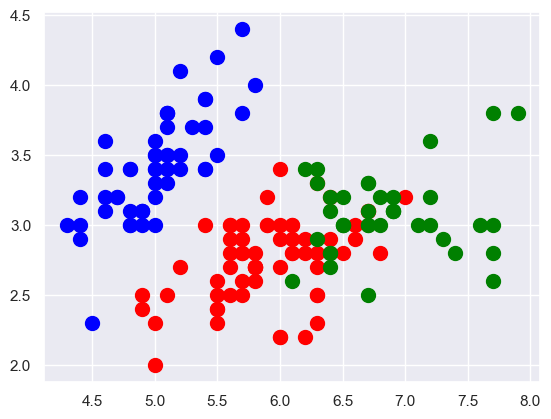

In [40]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green',label='Iris-virginica')

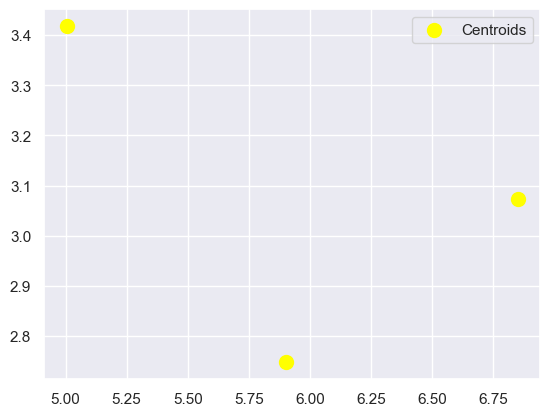

In [41]:
# Plotting the centorids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')
plt.legend()

### Data Visualization

In [43]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

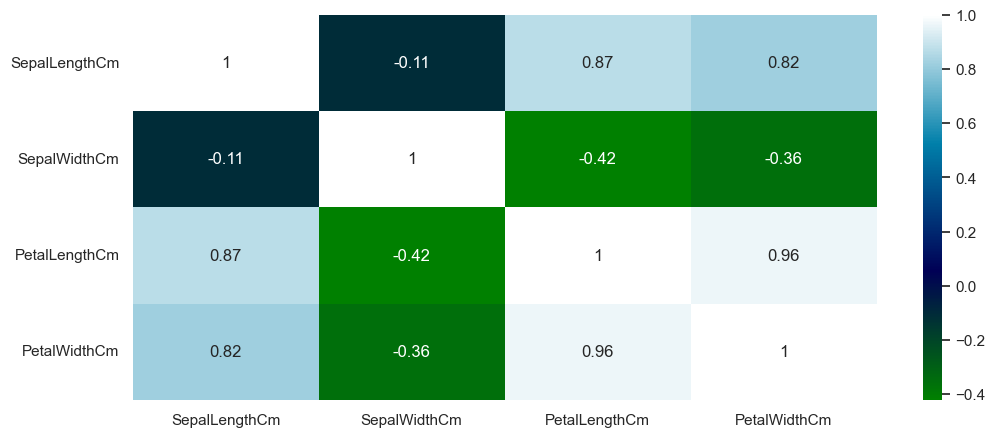

In [44]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True,cmap='ocean')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

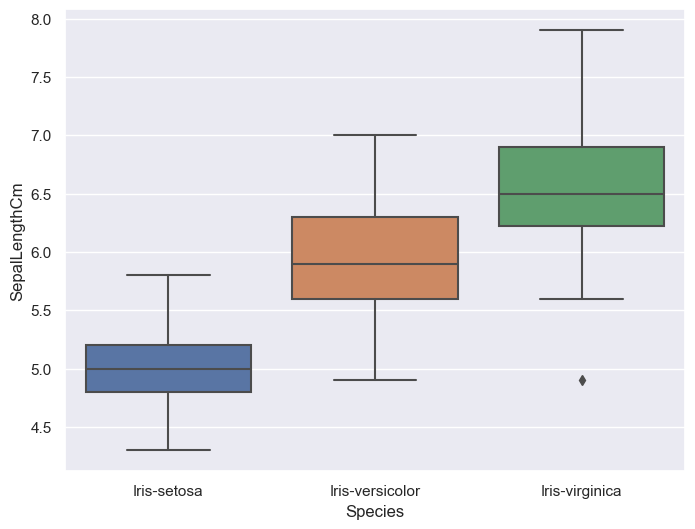

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=data)

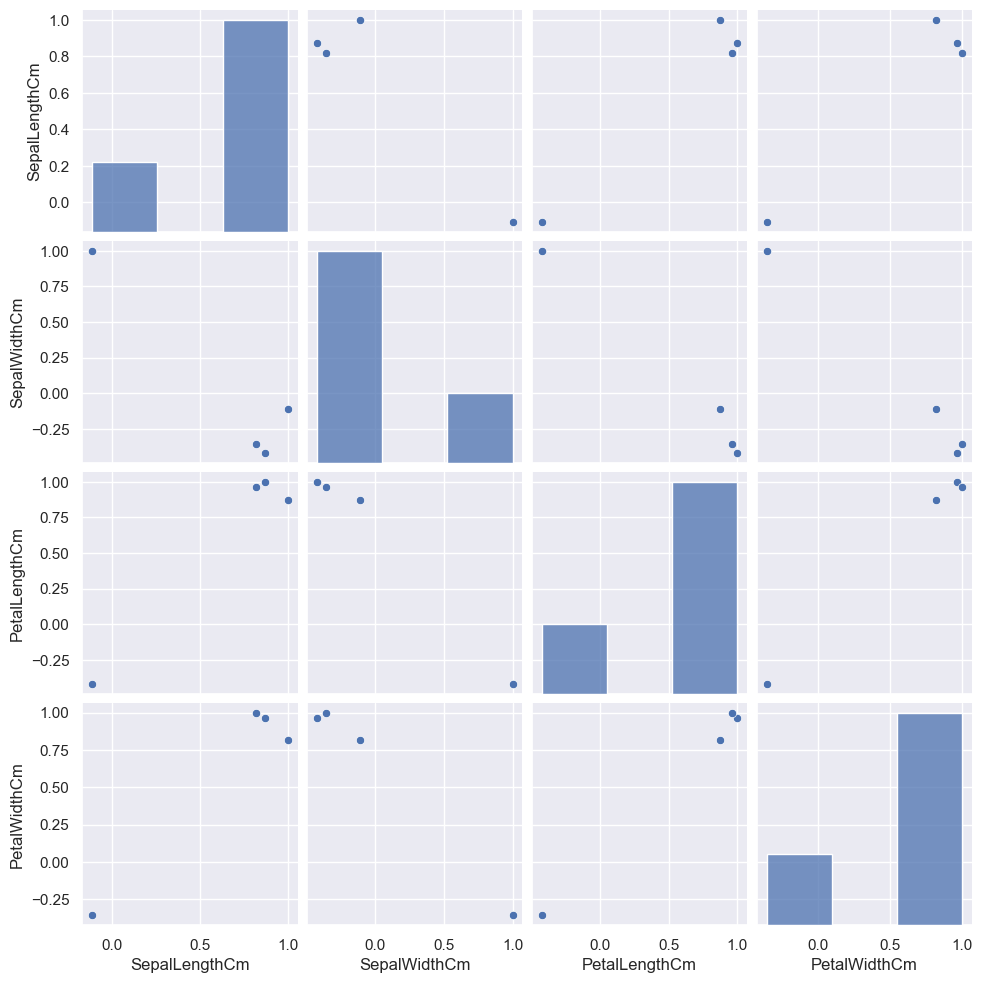

In [46]:
sns.pairplot(data.corr())

### Thanking You!